In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline
from fastai import *
from fastai.vision import *

In [2]:
data = ImageDataBunch.from_folder(Path('data/train_fastai/'), valid_pct=0.15,
                                  ds_tfms=[], size=500, bs=32)

In [3]:
data.normalize(imagenet_stats)

ImageDataBunch;

Train: LabelList
y: CategoryList (7406 items)
[Category fault, Category fault, Category fault, Category fault, Category fault]...
Path: data/train_fastai
x: ImageItemList (7406 items)
[Image (3, 500, 500), Image (3, 500, 500), Image (3, 500, 500), Image (3, 500, 500), Image (3, 500, 500)]...
Path: data/train_fastai;

Valid: LabelList
y: CategoryList (1306 items)
[Category no_fault, Category no_fault, Category no_fault, Category no_fault, Category fault]...
Path: data/train_fastai
x: ImageItemList (1306 items)
[Image (3, 500, 500), Image (3, 500, 500), Image (3, 500, 500), Image (3, 500, 500), Image (3, 500, 500)]...
Path: data/train_fastai;

Test: None

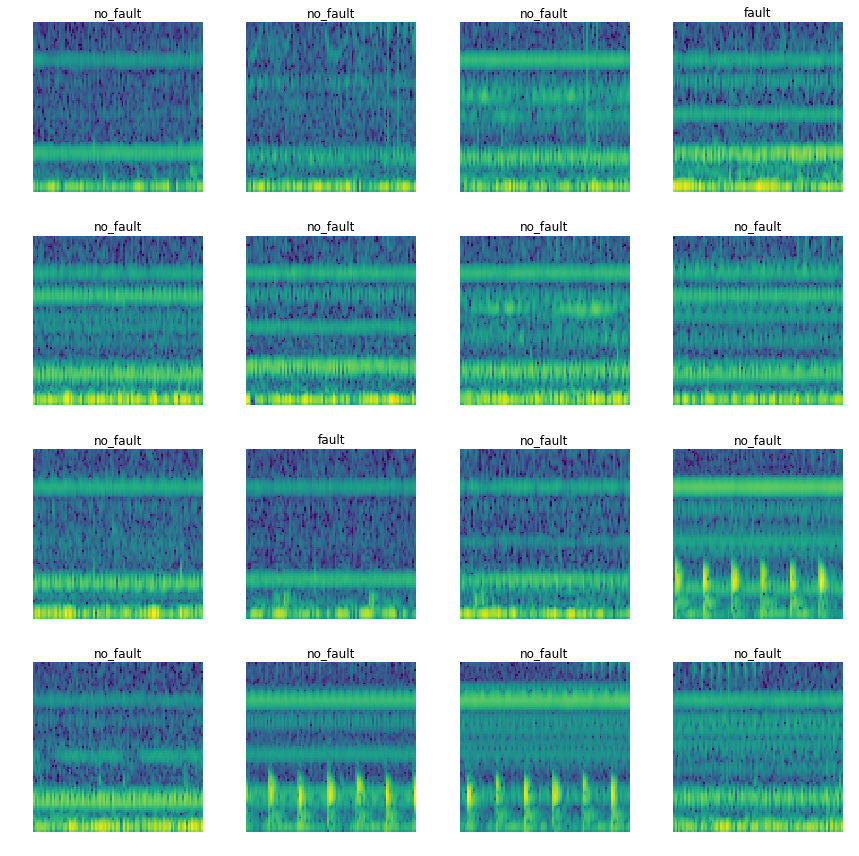

In [4]:
data.show_batch(rows=4, figsize=(12, 12))

In [4]:
learn = create_cnn(data, models.resnet34, metrics=[error_rate, accuracy] )

In [6]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


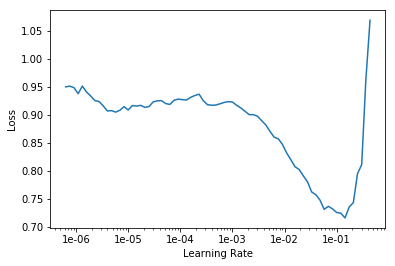

In [7]:
learn.recorder.plot()

In [8]:
learn.fit_one_cycle(2, max_lr=1e-2)

epoch,train_loss,valid_loss,error_rate,accuracy
1,0.226794,0.184821,0.056662,0.943338
2,0.156255,0.126743,0.047473,0.952527


In [11]:
learn.save('fastai1')

In [5]:
learn.load('fastai1');

In [6]:
learn.unfreeze()

In [7]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


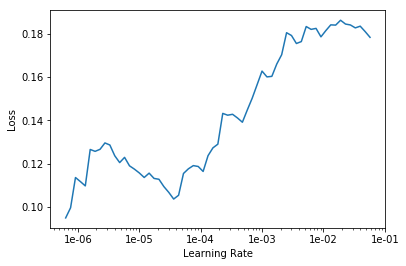

In [8]:
learn.recorder.plot()

In [12]:
learn.fit_one_cycle(1, max_lr=slice(1e-6,1e-5))

epoch,train_loss,valid_loss,error_rate,accuracy
1,0.121051,0.100315,0.041348,0.958652


In [13]:
learn.save('fastai2')

# prediction

In [46]:
classes = ['fault', 'no_fault']

In [49]:
data = ImageDataBunch.single_from_classes('', classes, tfms=[], size=500).normalize(imagenet_stats)

/opt/anaconda3/lib/python3.6/site-packages/fastai/data_block.py:388: UserWarning: Your training set is empty. Is this is by design, pass `ignore_empty=True` to remove this warning.
  warn("Your training set is empty. Is this is by design, pass `ignore_empty=True` to remove this warning.")
/opt/anaconda3/lib/python3.6/site-packages/fastai/data_block.py:391: UserWarning: Your validation set is empty. Is this is by design, use `no_split()` 
                 or pass `ignore_empty=True` when labelling to remove this warning.
  or pass `ignore_empty=True` when labelling to remove this warning.""")


In [50]:
learner = create_cnn(data, models.resnet34)
learner.load('fastai2');

In [51]:
predict_path = Path('data/test_sp/')

In [33]:
from mltoolbox.image import imread_fast

In [69]:
with open('fast1.csv', 'w') as fl:
    fl.write('signal_id,target\n')
    for fn in progress_bar(list(predict_path.iterdir())):
        img = open_image(str(fn))
        _, __, losses = learn.predict(img)
        fl.write(f"{str(fn).split('/')[-1].split('.')[0]}, {np.argmax(losses.data.numpy())}\n")

In [70]:
! head fast1.csv

signal_id,target
15668, 1
18487, 1
11454, 1
16468, 1
11146, 1
27613, 1
14583, 1
10603, 1
24465, 1
